In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import statsmodels.tsa.api as smt 
import seaborn as sns 
import warnings
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [21]:
df = pd.read_csv("data.csv")
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [22]:
class_col = "Class"

In [23]:
X = df.drop('Class',axis=1)
y = df["Class"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=27)

In [25]:
x_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train,x_with_constant)

In [26]:
results = model.fit()
results.params

const                          1.520460e+00
Sample code number            -1.247092e-08
Clump Thickness                5.576212e-02
Uniformity of Cell Size        5.867737e-02
Uniformity of Cell Shape       3.241110e-02
Marginal Adhesion              1.249241e-02
Single Epithelial Cell Size    3.347172e-02
Bare Nuclei                    9.233461e-02
Bland Chromatin                3.603232e-02
Normal Nucleoli                3.479978e-02
Mitoses                       -1.796302e-02
dtype: float64

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     277.2
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          5.97e-197
Time:                        01:14:00   Log-Likelihood:                -219.05
No. Observations:                 512   AIC:                             460.1
Df Residuals:                     501   BIC:                             506.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.5205      0.047     32.629      0.000       1.429       1.612
Sample code number          -1.247e-08   2.39e-08     -0.521      0.603   -5.95e-08    3.46e-08
Clump Thickness                 0.0558      0.008      6.745      0.000       0.040       0.072
Uniformity of Cell Size         0.0587      0.014      4.089      0.000       0.030       0.087
Uniformity of Cell Shape        0.0324      0.014      2.347      0.019       0.005       0.060
Marginal Adhesion               0.0125      0.009      1.327      0.185      -0.006       0.031
Single Epithelial Cell Size     0.0335      0.012      2.714      0.007       0.009       0.058
Bare Nuclei                     0.0923      0.007     12.781      0.000       0.078       0.107
Bland Chromatin                 0.0360      0.011      3.169      0.002       0.014       0.058
Normal Nucleoli                 0.0348      0.009      4.066      0.000       0.018       0.052
Mitoses                        -0.0180      0.011     -1.577      0.115      -0.040       0.004
==============================================================================
Omnibus:                       68.711   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.631
Skew:                           0.435   Prob(JB):                     2.19e-78
Kurtosis:                       7.001   Cond. No.                     3.66e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
x_test = sm.add_constant(X_test)

In [31]:
y_pred = results.predict(x_test)
y_pred

513    2.238003
651    2.058718
226    2.841165
31     3.806790
47     3.841406
         ...   
179    1.971264
307    3.750315
201    1.915343
358    2.121526
653    4.004547
Length: 171, dtype: float64

In [49]:
residuals = y_test - y_pred

# There is a mutli colinearly since the variance inflation factor is greater than 5 

In [50]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({"vif": vif[0:]}, index= X_train.columns).T

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
vif,2.234295,5.524943,12.994098,12.849878,5.33215,7.780203,4.650185,7.478444,4.793375,2.725357


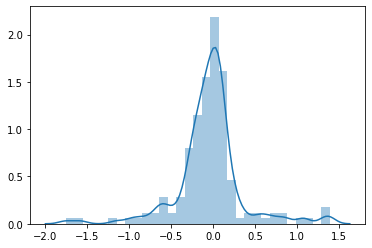

In [52]:
sns.distplot(residuals)

# Checking for Homoscedasticity

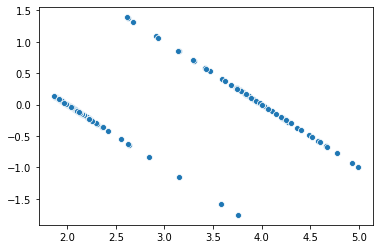

In [57]:
ax = sns.scatterplot(x= y_pred, y = residuals)

# Checking for the correlation between residuals 

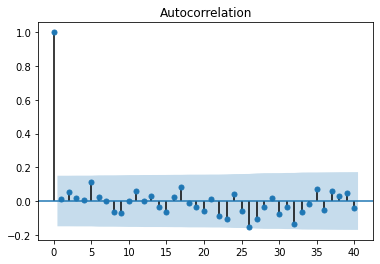

In [58]:
acf = smt.graphics.plot_acf(residuals, lags = 40, alpha = 0.05)